# Random Walks 

> In mathematics, a random walk, sometimes known as a drunkard's walk, is a stochastic process that describes a path that consists of a succession of random steps on some mathematical space. 
>
> An elementary example of a random walk is the random walk on the integer number line Z which starts at 0, and at each step moves +1 or −1 with equal probability. 
>
> https://en.wikipedia.org/wiki/Random_walk


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

## Pure Python Way

Let’s first consider a simple random walk starting at 0 with steps of 1 and
–1 occurring with equal probability.

Here is a pure Python way to implement a single random walk with 1,000 steps using
the built-in random module:

In [3]:
import random
position = 0
walk = [position]
nsteps = 1000
for _ in range(nsteps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

Let's plot the first 100 values on one of these random walks:

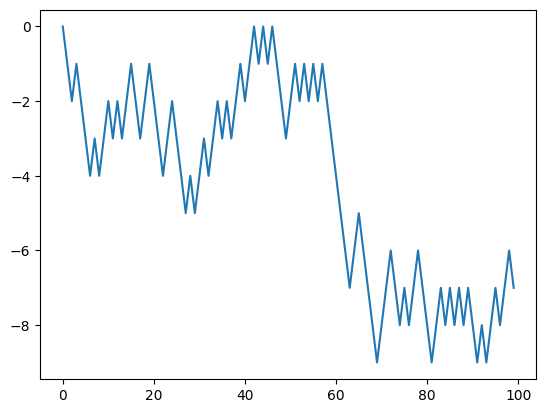

In [5]:
plt.plot(walk[:100])

## Numpy Way 

I use the `numpy.random` module to draw 1,000 coin flips at once, set these to 1 and –1, and compute the cumulative sum:

In [8]:
nsteps = 1000
rng = np.random.default_rng(seed=12345)
draws = rng.integers(0, 2, size=nsteps)
steps = np.where(draws == 0, 1, -1)
walk = steps.cumsum()

In [9]:
walk.min()

np.int64(-8)

In [10]:
walk.max()

np.int64(50)

In [11]:
(np.abs(walk) >= 10).argmax()

np.int64(155)

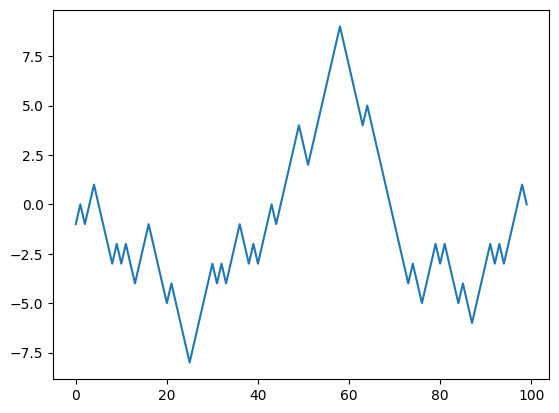

In [27]:
plt.plot(walk[:100])

## Simulating Many Random Walks at Once

In [12]:
nwalks = 5000
nsteps = 1000
draws = rng.integers(0, 2, size=(nwalks, nsteps)) # 0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(axis=1)
walks

array([[  1,   2,   3, ...,  22,  23,  22],
       [  1,   0,  -1, ..., -50, -49, -48],
       [  1,   2,   3, ...,  50,  49,  48],
       ...,
       [ -1,  -2,  -1, ..., -10,  -9, -10],
       [ -1,  -2,  -3, ...,   8,   9,   8],
       [ -1,   0,   1, ...,  -4,  -3,  -2]], shape=(5000, 1000))

In [13]:
walks.max()

np.int64(114)

In [14]:
walks.min()

np.int64(-120)

In [15]:
hits30 = (np.abs(walks) >= 30).any(axis=1)
hits30

array([False,  True,  True, ...,  True, False,  True], shape=(5000,))

In [16]:
hits30.sum()

np.int64(3395)

In [17]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(axis=1)
crossing_times

array([201, 491, 283, ..., 219, 259, 541], shape=(3395,))

In [18]:
crossing_times.mean()

np.float64(500.5699558173785)

## Different Random Generator

Let's use a different random generator method, like `standard_normal` to generate normally distributed steps with some mean and standard deviation:

In [20]:
draws = 0.25 * rng.standard_normal((nwalks, nsteps))
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(axis=1)
walks

array([[  1,   2,   1, ..., -16, -15, -16],
       [  1,   0,   1, ...,  10,   9,   8],
       [ -1,   0,  -1, ..., -60, -59, -58],
       ...,
       [ -1,   0,  -1, ..., -70, -71, -70],
       [  1,   0,  -1, ..., -24, -23, -22],
       [  1,   2,   1, ..., -14, -15, -14]], shape=(5000, 1000))

In [21]:
walks.max()

np.int64(112)

In [22]:
walks.min()

np.int64(-118)

In [23]:
hits30 = (np.abs(walks) >= 30).any(axis=1)
hits30

array([False, False,  True, ...,  True,  True, False], shape=(5000,))

In [24]:
hits30.sum()

np.int64(3402)

In [25]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(axis=1)
crossing_times

array([367, 589, 221, ..., 413, 649, 311], shape=(3402,))

In [26]:
crossing_times.mean()

np.float64(502.5537918871252)